# Packages et jeu de donnée

In [1]:
!pip install optuna
!pip install transformers

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 5.2 MB/s 
     |████████████████████████████████| 210 kB 19.5 MB/s 
     |████████████████████████████████| 78 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 1.9 MB/s 
     |████████████████████████████████| 146 kB 39.5 MB/s 
     |████████████████████████████████| 113 kB 40.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=1dd1197fb9341860efa095363d3ac73a2f9b2826d2666a146a9246410cca29c5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 35.9 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 
     |████████████████████████████████| 596 kB 36.7 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
  Attempting uninstall

In [2]:
#data management
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

#toekenisation
from nltk.tokenize import TreebankWordTokenizer
import re

#model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
labels = ['Computer Science',
'Physics',
'Mathematics',
'Statistics',
'Quantitative Biology',
'Quantitative Finance']

In [4]:
git_url = 'https://raw.githubusercontent.com/Cecileboul/NLP-classification-science-article/main/'
df = pd.read_csv(git_url + 'train.csv', index_col=0, engine='python')

In [5]:
# Create test and training datasets
import random
proportion = 0.7
nb = int(proportion * len(df))
sample_id = random.sample(list(df.index.unique()), k=nb)
df_train = df[df.index.isin(sample_id)]
df_test = df[~df.index.isin(sample_id)]

# I/ descriptive statistics and preprocessing

## I/1. Preprocessing

In [6]:
# Removing of stop words and tokenisation
from gensim.parsing.preprocessing import remove_stopwords

def filter_element_with_number(tokens):
    tokens = filter(lambda x: re.match(r'(?!\D*\d)', x), tokens)
    return list(tokens)

def filter_punctuation(tokens):
    tokens = filter(lambda x: re.match('\w', x), tokens)
    return list(tokens)

def tokenize_remove(corpus):
    corpus = corpus.lower()
    corpus=remove_stopwords(corpus)
    corpus_token=TreebankWordTokenizer().tokenize(corpus)
    corpus_token = filter_element_with_number(corpus_token)
    corpus_token = filter_punctuation(corpus_token)
    return corpus_token

## I/ 2. Descriptive statistics

#### a. Data quality

In [7]:
#The database seems clean
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15972 entries, 1 to 15972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     15972 non-null  object
 1   ABSTRACT  15972 non-null  object
 2   label     15972 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1015.2+ KB


In [8]:
# Title
df.TITLE[3]

'Verifying Security Protocols using Dynamic Strategies'

In [9]:
# Abstract
df.ABSTRACT[1]

'  In many developing countries, public transit plays an important role in daily\nlife. However, few existing methods have considered the influence of public\ntransit in their models. In this work, we present a dual-perspective view of\nthe epidemic spreading process of the individual that involves both\ncontamination in places (such as work places and homes) and public transit\n(such as buses and trains). In more detail, we consider a group of individuals\nwho travel to some places using public transit, and introduce public transit\ninto the epidemic spreading process. A novel modeling framework is proposed\nconsidering place-based infections and the public-transit-based infections. In\nthe urban scenario, we investigate the public transit trip contribution rate\n(PTTCR) in the epidemic spreading process of the individual, and assess the\nimpact of the public transit trip contribution rate by evaluating the volume of\ninfectious people. Scenarios for strategies such as public transit 

In [10]:
# No duplicates 
len(df.TITLE.unique())

15972

In [11]:
# Imbalanced data set
df.value_counts('label', normalize=True)

label
0    0.409404
1    0.263148
2    0.209679
3    0.086464
4    0.021225
5    0.010080
dtype: float64

#### b. Words occurence

In [12]:
# average number of words Abstract/résumé
# As expected title longer than abstract. More info in the abstract? 
print(df.TITLE.apply(lambda x : len(x)).mean())
print(df.ABSTRACT.apply(lambda x : len(x)).mean())

72.83815426997245
1011.6317305284248


In [13]:
# Only on titles because it takes too much time on abstract
from functools import reduce
from operator import add

# List of words with separator = " "
arr_title = df.TITLE.drop_duplicates().apply(lambda x: x.split(' ')).array

arr_title = reduce(add, arr_title)
len(set(arr_title))

28868

In [14]:
# Title looks pretty clean, we can infer that it is the same in abstract.
from collections import Counter
print(Counter(arr_title))

Counter({'of': 7156, 'and': 4518, 'for': 4374, 'in': 3801, 'the': 3685, 'with': 2103, 'a': 1647, 'A': 1572, 'on': 1389, 'to': 1178, 'Learning': 998, 'The': 847, 'On': 663, 'Networks': 629, 'from': 584, 'Deep': 552, 'using': 534, 'by': 529, 'Neural': 488, 'Data': 401, 'An': 399, 'Analysis': 375, 'via': 375, 'Network': 333, 'Model': 324, 'Using': 323, 'an': 318, 'model': 308, 'Models': 279, 'at': 259, 'Systems': 246, 'Estimation': 235, 'Approach': 226, 'Bayesian': 218, 'Optimization': 214, 'Detection': 211, 'analysis': 207, 'quantum': 203, 'networks': 199, 'as': 197, 'systems': 195, 'based': 195, 'Stochastic': 193, 'models': 192, 'Control': 191, 'data': 190, 'Optimal': 182, 'Machine': 181, 'equations': 178, 'Efficient': 170, 'Quantum': 167, 'Robust': 167, 'Classification': 165, 'Adversarial': 158, 'Algorithm': 154, 'Linear': 149, 'learning': 148, 'approach': 146, 'dynamics': 145, 'Modeling': 144, 'Dynamic': 143, 'between': 143, 'Based': 139, 'under': 139, 'Gaussian': 139, 'Graph': 139, '

In [15]:
# Let's look at the word occurrences after the database cleaning.
tokenized_sentences = df.TITLE.apply(lambda x: tokenize_remove(x)).array

In [16]:
# Most used words
voc_title =  reduce(add, tokenized_sentences)
print(Counter(voc_title))

Counter({'learning': 1190, 'networks': 897, 'model': 641, 'deep': 619, 'data': 618, 'analysis': 595, 'neural': 577, 'models': 494, 'systems': 476, 'network': 444, 'approach': 373, 'quantum': 370, 'estimation': 338, 'based': 335, 'control': 296, 'detection': 279, 'optimization': 275, 'stochastic': 273, 'dynamics': 263, 'linear': 255, 'method': 253, 'theory': 248, 'optimal': 240, 'equations': 238, 'classification': 228, 'algorithm': 225, 'bayesian': 218, 'structure': 216, 'random': 215, 'machine': 214, 'efficient': 212, 'applications': 211, 'study': 210, 'problem': 209, 'time': 204, 'graphs': 198, 'new': 197, 'modeling': 195, 'robust': 192, 'functions': 191, 'properties': 189, 'dynamic': 187, 'energy': 186, 'groups': 186, 'prediction': 181, 'magnetic': 180, 'graph': 180, 'methods': 179, 'inference': 178, 'adversarial': 175, 'information': 173, 'spaces': 171, 'application': 171, 'equation': 170, 'finite': 168, 'nonlinear': 168, 'large': 166, 'problems': 163, 'space': 162, 'generalized': 1

In [17]:
# Let's try to look at the most frequent words according to their belonging to each class.
df['tokenized_sentences'] = tokenized_sentences
df_most_present_word = pd.DataFrame()
for label in tqdm(df.label.unique()):
  voc_1 = reduce(add, df[df['label']==label]['tokenized_sentences'])
  df_most_present_word[str(label)] = sorted(Counter(voc_1), key=Counter(voc_1).get, reverse=True)[0:10]

  0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
# Can already see words that may be interesting. Seems to be able to discriminate already.
df_most_present_word.columns = labels
df_most_present_word

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,learning,quantum,groups,learning,model,model
1,networks,model,equations,data,networks,risk
2,deep,magnetic,spaces,deep,dynamics,market
3,neural,dynamics,algebras,networks,neural,stochastic
4,data,systems,functions,neural,learning,optimal
5,analysis,phase,problem,models,analysis,models
6,network,theory,solutions,bayesian,network,markets
7,model,field,estimation,analysis,brain,volatility
8,systems,energy,models,model,protein,portfolio
9,models,spin,linear,estimation,models,approach


In [19]:
# Let's try with description
tokenized_sentences_abs = df.ABSTRACT.apply(lambda x: tokenize_remove(x)).array

In [20]:
df['tokenized_sentences_abs'] = tokenized_sentences_abs
df_most_present_word = pd.DataFrame()
for label in tqdm(df.label.unique()):
  voc_1 = reduce(add, df[df['label']==label]['tokenized_sentences_abs'])
  df_most_present_word[str(label)] = sorted(Counter(voc_1), key=Counter(voc_1).get, reverse=True)[0:10]

  0%|          | 0/6 [00:00<?, ?it/s]

In [21]:
# Also interesting statistics. We can see that many words are common (model, paper). But some words are specific to each class.
df_most_present_word

,0,1,2,3,4,5
0,data,model,paper,data,model,model
1,model,results,n,model,networks,market
2,paper,energy,prove,learning,data,price
3,learning,magnetic,results,method,network,risk
4,network,field,study,models,results,results
5,problem,quantum,g,methods,brain,data
6,algorithm,phase,x,approach,different,approach
7,results,study,problem,proposed,neural,paper
8,method,data,k,paper,study,volatility
9,based,different,f,based,models,time


# II/ First models

## II/ 1. Decision rules

The first idea is to compute a score according to the occurrences of the words in each class. The predicted class will be the one with the best score.

In [22]:
tokenized_sentences_abs_train = df_train.ABSTRACT.apply(lambda x: tokenize_remove(x)).array
df_train['tokenized_sentences_abs'] = tokenized_sentences_abs_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
list_voc = []
for label in tqdm(df.label.unique()):
  voc = Counter(reduce(add, df_train[df_train['label']==label]['tokenized_sentences_abs']))
  #voc = Counter(dict(voc.most_common(100)))
  list_voc.append(voc)

  0%|          | 0/6 [00:00<?, ?it/s]

In [24]:
# get proportion of occurence
min_value = []
max_value = []
for i in range(len(list_voc)):
  max_value.append(max(list_voc[i].values()))
  min_value.append(min(list_voc[i].values()))

In [25]:
for i in tqdm(range(len(list_voc))):
  list_voc[i] = Counter({key: (value - min_value[i])/(max_value[i] - min_value[i]) for key, value in list_voc[i].items()})

  0%|          | 0/6 [00:00<?, ?it/s]

In [26]:
def classifier_most_word(corpus):
  prediction = []
  for abstract in tqdm(corpus):
    all_score = []
    for count in list_voc:
      score = 0
      for words in abstract:
        score += count[words]
      all_score.append(score)
    prediction.append(all_score.index(max(all_score)))
  return prediction

In [27]:
tokenized_sentences_abstract_test = df_test.ABSTRACT.apply(lambda x: tokenize_remove(x)).array

In [28]:
prediction = classifier_most_word(tokenized_sentences_abstract_test)

  0%|          | 0/4792 [00:00<?, ?it/s]

In [29]:
print(classification_report(df_test.label, prediction))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1916
           1       0.79      0.86      0.82      1244
           2       0.59      0.92      0.72      1045
           3       0.00      0.00      0.00       442
           4       0.48      0.13      0.21       104
           5       0.71      0.12      0.21        41

    accuracy                           0.70      4792
   macro avg       0.55      0.45      0.45      4792
weighted avg       0.65      0.70      0.66      4792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Marche pas si mal mais les faibles classes ne sont pas prédites ou très peu.
confusion_matrix(df_test.label, prediction)

array([[1321,  141,  446,    0,    7,    1],
       [  46, 1074,  117,    0,    7,    0],
       [  46,   37,  961,    0,    0,    1],
       [ 309,   40,   92,    0,    1,    0],
       [  29,   56,    5,    0,   14,    0],
       [   8,   13,   15,    0,    0,    5]])

## II/ 2. Countvectorizer and SVM

Only use of the titles

In [31]:
tokenized_sentences_title_train = df_train.TITLE.apply(lambda x: tokenize_remove(x)).array
X_train = [' '.join(x) for x in tokenized_sentences_title_train]
Y_train = df_train.label

In [32]:
tokenized_sentences_title_test = df_test.TITLE.apply(lambda x: tokenize_remove(x)).array
X_test = [' '.join(x) for x in tokenized_sentences_title_test]
Y_test = df_test.label

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

# for dev set
X_test_cv = cv.transform(X_test)
X_test_cv.shape

(4792, 13183)

In [34]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_trained = lb.fit(Y_train)
y_train_lb = lb_trained.transform(Y_train)
y_test_lb = lb_trained.transform(Y_test)
print(y_train_lb.shape, y_test_lb.shape)

(11180, 6) (4792, 6)


In [35]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

svc = svm.SVC(kernel='linear', probability=True)
clf_svm = OneVsRestClassifier(svc)
clf_svm = clf_svm.fit(X_train_cv, y_train_lb)

#### a. Evaluation quantitative 

In [36]:
y_score_svm = clf_svm.decision_function(X_test_cv)

In [37]:
def show_eval(y_true, y_pred, lb_trained, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names))
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = ['Computer Science',
            'Physics',
            'Mathematics',
            'Statistics',
            'Quantitative Biology',
            'Quantitative Finance']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i, label in enumerate(labels):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(label, roc_auc[i])

  for i, label in enumerate(labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+label)
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1916
           1       0.82      0.80      0.81      1244
           2       0.67      0.70      0.68      1045
           3       0.29      0.16      0.20       442
           4       0.38      0.19      0.25       104
           5       0.46      0.41      0.44        41

    accuracy                           0.70      4792
   macro avg       0.55      0.51      0.52      4792
weighted avg       0.68      0.70      0.69      4792



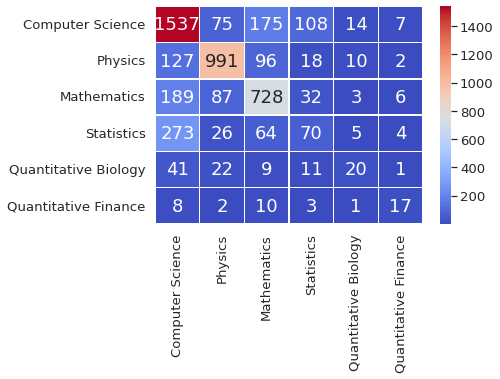

Computer Science 0.8545621600982576
Physics 0.937045280707033
Mathematics 0.8830683047235236
Statistics 0.7022190149269257
Quantitative Biology 0.8187085685219218
Quantitative Finance 0.9101087832600069


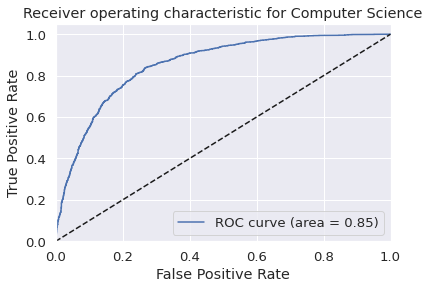

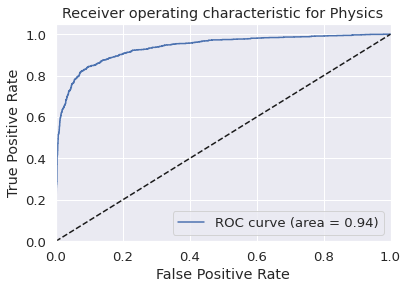

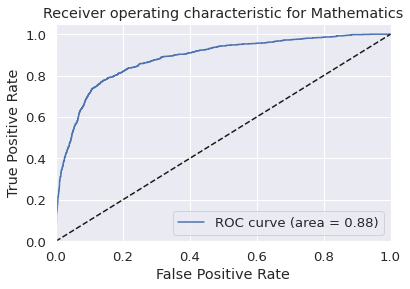

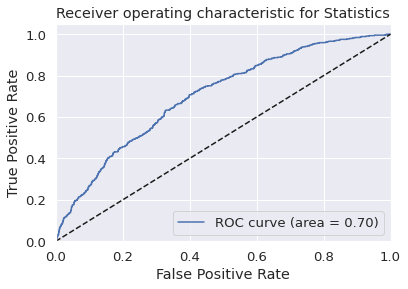

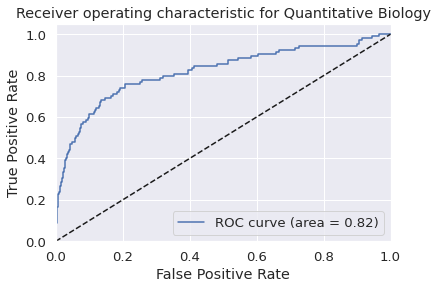

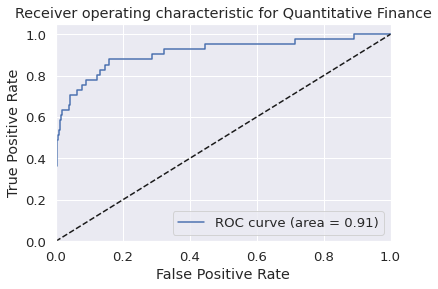

In [38]:
show_eval(y_test_lb, y_score_svm, lb_trained, clf_svm)

#### b. qualitative evaluation

The classical SVM model is quite good as well as the model with decision rules. The next objective will be to test more "powerful" models and to manage imbalanced classes.

# III/ Complex models

## III/ 1. SVM and f1_score

Here we consider the macro score f1 because the latter considers that each label is as important as any other regardless of its proportion in the database. We consider that each element are equaly important

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model_to_set = OneVsRestClassifier(svm.SVC(kernel="linear"))

parameters4 = {'estimator__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
balanced_scorer = make_scorer(f1_score, average='macro')

clf_svm_f1w = GridSearchCV(model_to_set, parameters4, cv=3, scoring=balanced_scorer)
clf_svm_f1w.fit(X_train_cv, y_train_lb)

print('Returned hyperparameter: {}'.format(clf_svm_f1w.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf_svm_f1w.best_score_))

Returned hyperparameter: {'estimator__C': 1.0}
Best Balanced accuracy in train is: 0.4690893453584537


In [40]:
svm_f1_score=clf_svm_f1w.decision_function(X_test_cv)

#### a. Quantitative evaluation

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1916
           1       0.82      0.80      0.81      1244
           2       0.67      0.70      0.68      1045
           3       0.29      0.16      0.20       442
           4       0.38      0.19      0.25       104
           5       0.46      0.41      0.44        41

    accuracy                           0.70      4792
   macro avg       0.55      0.51      0.52      4792
weighted avg       0.68      0.70      0.69      4792



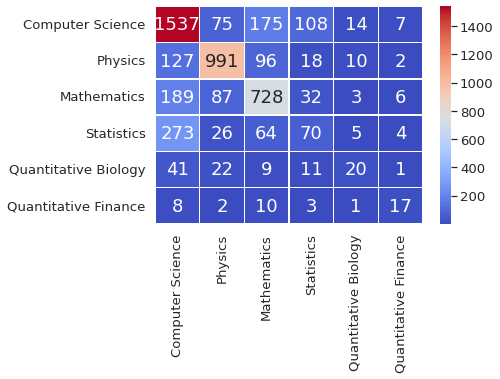

Computer Science 0.8545621600982576
Physics 0.937045280707033
Mathematics 0.8830683047235236
Statistics 0.7022190149269257
Quantitative Biology 0.8187085685219218
Quantitative Finance 0.9101087832600069


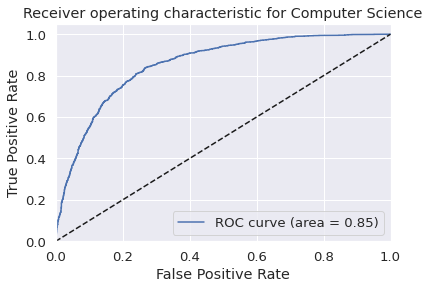

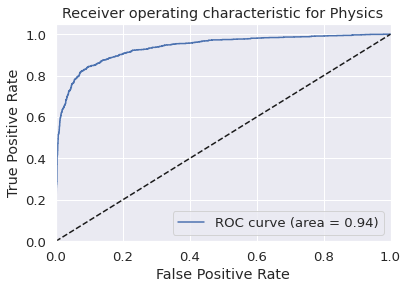

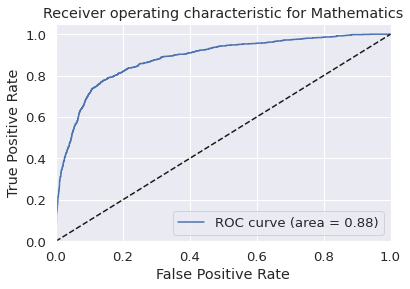

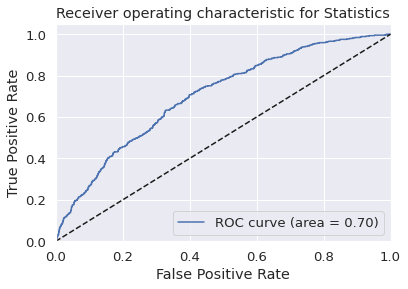

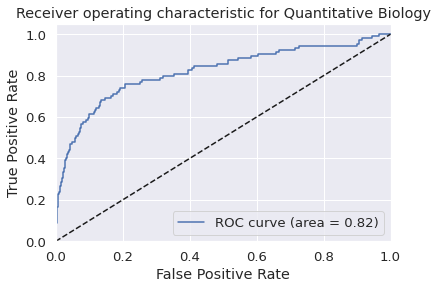

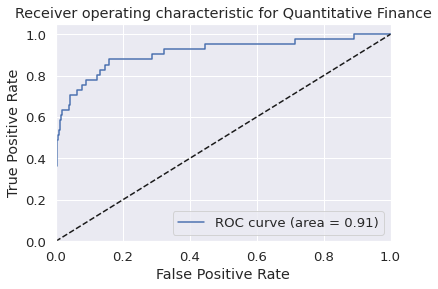

In [41]:
show_eval(y_test_lb, svm_f1_score, lb_trained, clf_svm_f1w)

Not much more efficient. Let's try a more powerful model.

## III/ 2. Xg_boost and optuna optimisation

In [42]:
n_trials = 10
rnd_state = 42

In [43]:
import optuna
import xgboost as xgb

class Objective(object):
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def __call__(self, trial):
        param = {"use_label_encoder": "False", "verbosity": 0, "objective": "multi:softmax", 'num_class': 6,
                 'random_state': rnd_state,
                 "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
                 "lambda": trial.suggest_float("lambda", 0, 5),
                 "alpha": trial.suggest_float("alpha", 0, 5),
                 "max_depth": trial.suggest_int("max_depth", 5, 9),
                 "eta": trial.suggest_float("eta", 0.01, 1.0),
                 "gamma": trial.suggest_float("gamma", 0, 3)}

        clf_xgb = xgb.XGBClassifier(**param)
        clf_xgb.fit(self.x_train, self.y_train)
        preds = clf_xgb.predict_proba(self.x_test)
        pred_labels = np.argmax(np.rint(preds), axis=1)

        # get scores and conf matrix
        f1_score_macro = f1_score(self.y_test, pred_labels, average='macro')

        return f1_score_macro

In [44]:
objective = Objective(X_train_cv, X_test_cv, Y_train, Y_test)

study = optuna.create_study(study_name="optuna",
                                direction='maximize')

study.optimize(objective, n_trials=5, n_jobs=-1)

[I 2022-04-24 15:46:24,812] A new study created in memory with name: optuna
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  FutureWarning,
[I 2022-04-24 15:47:01,503] Trial 0 finished with value: 0.30961021791524074 and parameters: {'booster': 'gbtree', 'lambda': 4.598205515951003, 'alpha': 1.720147366765421, 'max_depth': 6, 'eta': 0.6635977453990428, 'gamma': 1.6055242175322757}. Best is trial 0 with value: 0.30961021791524074.
[I 2022-04-24 15:47:24,262] Trial 1 finished with value: 0.29289211871496906 and parameters: {'booster': 'dart', 'lambda': 3.164376456618669, 'alpha': 0.8913727101246899, 'max_depth': 5, 'eta': 0.38855965923100544, 'gamma': 2.1529500789513523}. Best is trial 0 with value: 0.30961021791524074.
[I 2022-04-24 15:48:00,020] Trial 3 finished with value: 0.2856904057386658 and parameters:

In [45]:
study.best_trial

FrozenTrial(number=2, values=[0.33924225286674886], datetime_start=datetime.datetime(2022, 4, 24, 15, 47, 1, 507595), datetime_complete=datetime.datetime(2022, 4, 24, 15, 48, 27, 305937), params={'booster': 'dart', 'lambda': 0.7884833982577161, 'alpha': 3.8482673962521465, 'max_depth': 7, 'eta': 0.484710444394448, 'gamma': 0.07003459563143688}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'dart')), 'lambda': UniformDistribution(high=5.0, low=0.0), 'alpha': UniformDistribution(high=5.0, low=0.0), 'max_depth': IntUniformDistribution(high=9, low=5, step=1), 'eta': UniformDistribution(high=1.0, low=0.01), 'gamma': UniformDistribution(high=3.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)

We can see that the f1 score is much lower than with the SVM. For time constraints we decide not to go further in this track and we will try a deep learning model

# IV/ BERT model

a. obtaining the vocabulary and architecture of the network

In [46]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] if w in to_ix else len(to_ix) for w in seq]
    idxs = torch.tensor(idxs, dtype=torch.long).unsqueeze(0)
    return idxs

In [47]:
df['tokenized_sentences'] = df['tokenized_sentences'].apply(lambda x : " ".join(x))
df_train = df[df.index.isin(df_train.index)].reset_index()
df_test = df[df.index.isin(df_test.index)].reset_index()

In [48]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from transformers import BertTokenizer, AutoModel, AutoTokenizer
import pandas as pd
from torch.utils.data import DataLoader

class feature_dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, dataframe, maxlen, model_name='bert-base-uncased'):

        #Store the contents of the file in a pandas dataframe
        self.dataset = dataframe
        #Initialize the BERT tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        self.maxlen = maxlen

    def __len__(self):
        return len(self.dataset)


    def __getitem__(self, index):

        #Selecting the sentence and label at the specified index in the data frame

        sentence = self.dataset['TITLE'][index]
        label = self.dataset['label'][index]

        #Preprocessing the text to be suitable for BERT
        tokens = self.tokenizer.tokenize(sentence) #Tokenize the sentence
        if self.tokenizer.cls_token is None:
            bos_token = self.tokenizer.bos_token
        else:
            bos_token = self.tokenizer.cls_token
          
        if self.tokenizer.sep_token is None:
            eos_token = self.tokenizer.eos_token
        else:
            eos_token = self.tokenizer.sep_token
        
        tokens = [bos_token] + tokens + [eos_token] #Insering the CLS and SEP token in the beginning and end of the sentence
        if len(tokens) < self.maxlen:
            tokens = tokens + [self.tokenizer.pad_token for _ in range(self.maxlen - len(tokens))] #Padding sentences
        else:
            tokens = tokens[:self.maxlen-1] + [eos_token] #Prunning the list to be of specified max length

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) #Obtaining the indices of the tokens in the BERT Vocabulary
        tokens_ids_tensor = torch.tensor(tokens_ids) #Converting the list to a pytorch tensor
        #Obtaining the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attn_mask = (tokens_ids_tensor != 0).long()

        return tokens_ids_tensor, attn_mask, label

In [49]:
train_set = feature_dataset(dataframe = df_train, maxlen = 30, model_name='bert-base-uncased')
test_set = feature_dataset(dataframe = df_test, maxlen = 30, model_name='bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [50]:
train_loader = DataLoader(train_set, batch_size = 32, num_workers = 2)
test_loader = DataLoader(test_set, batch_size = 1, num_workers = 2)

In [51]:
class SentimentClassifier(nn.Module):

    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(SentimentClassifier, self).__init__()
        
        #Loading Mask Language Model 
        self.encoder = AutoModel.from_pretrained(pretrained_model_name)
        #we append an extra layer for Classification (it will be randomly initialized)
        self.cls_layer = nn.Linear(self.encoder.pooler.dense.out_features, 6)

    def forward(self, seq, attn_masks):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        # see in the hugging face doc what to input
        #cont_reps = #  self.encoder(..)..
        cont_reps = self.encoder(seq, attention_mask = attn_masks)
        #Obtaining the representation of [CLS] head
        pool = cont_reps["pooler_output"]

        #Feeding cls_rep to the classifier layer
        logits = self.cls_layer(pool)

        return logits

In [52]:
!nvidia-smi

Sun Apr 24 15:48:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    78W / 149W |     70MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [53]:
# we now instansiate the model 
#sentiment_model = SentimentClassifier('bert-base-uncased')
# if gpu mode
#sentiment_model = sentiment_model.to("cuda")
# to check if the weights of the model are in gpu : 
# sentiment_model.cls_layer.weight.is_cuda
# can checkout all the layers by running 
sentiment_model = SentimentClassifier('bert-base-uncased')
# if gpu mode
sentiment_model = sentiment_model.to("cuda")
# to check if the weights of the model are in gpu : 
# sentiment_model.cls_layer.weight.is_cuda
# can checkout all the layers by running 
#sentiment_model

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
import torch.nn as nn
import torch.optim as optim

# Poids pour gérer les classes imbalanced
weight = df.value_counts('label').max()/df.value_counts('label')
poids=torch.tensor(weight,dtype=torch.float32).cuda() #Poids

# define the loss and optimizer 
criterion = nn.CrossEntropyLoss(poids)
opti = optim.Adam(sentiment_model.parameters(), lr = 1e-4)

In [55]:
import pdb
def train(model, criterion, opti, train_loader, max_eps=5, gpu=False, print_every=1,validate_every=1, break_training_after=None):
    if gpu:
      model = model.to("cuda")
    for ep in tqdm(range(max_eps)):
        
        for it, (seq, attn_masks, labels) in tqdm(enumerate(train_loader)):
            #Clear gradients
            opti.zero_grad()  
            #Converting these to cuda tensors
            if gpu:
              seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            #Obtaining the logits from the model
            logits = model(seq, attn_masks)

            #Computing loss
            loss = criterion(logits.squeeze(-1), labels)

            #Backpropagating the gradients
            loss.backward()

            #Optimization step
            opti.step()

In [56]:
train(sentiment_model, criterion, opti, train_loader, max_eps=5, print_every=10, gpu=True)

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [57]:
import pdb
def validation(model, val_loader, max_eps=1, gpu=False):
  model.eval()
  with torch.no_grad():
    y_pred=[]
    if gpu:
      model = model.to("cuda")
    for ep in range(max_eps):
      for it, (seq, attn_masks, labels) in enumerate(tqdm(val_loader)):
      #Converting these to cuda tensors
        if gpu:
          seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
        #Obtaining the logits from the model
        logits = model(seq, attn_masks)
        y_pred.append(logits)
  return y_pred

In [58]:
y_pred=validation(sentiment_model, test_loader, gpu=True)

  0%|          | 0/4792 [00:00<?, ?it/s]

In [59]:
y_pred_label=[]
for i in range(len(y_pred)):
  y_pred_label.append(np.argmax(y_pred[i][0].detach().cpu().numpy()))

In [60]:
def show_eval(y_true, y_pred, lb_trained):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''
  print(classification_report(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred) 
  labels = ['Computer Science',
            'Physics',
            'Mathematics',
            'Statistics',
            'Quantitative Biology',
            'Quantitative Finance']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1916
           1       0.00      0.00      0.00      1244
           2       0.00      0.00      0.00      1045
           3       0.00      0.00      0.00       442
           4       0.00      0.00      0.00       104
           5       0.00      0.00      0.00        41

    accuracy                           0.40      4792
   macro avg       0.07      0.17      0.10      4792
weighted avg       0.16      0.40      0.23      4792



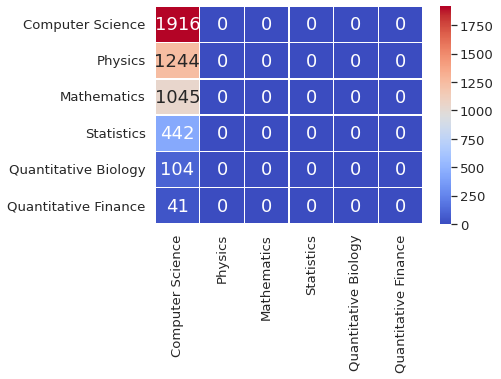

In [61]:
show_eval(df_test.label, y_pred_label, y_pred)